In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df= pd.read_csv("orders dispatched.csv")

In [3]:
df

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
...,...,...,...,...,...,...,...,...,...
396502,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40
396503,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
396504,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80
396505,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80


In [4]:
df.dtypes

invoice no        int64
stock code       object
description      object
quantity          int64
invoice date     object
unit price      float64
customer ID       int64
country          object
total price     float64
dtype: object

In [5]:
df["invoice date"]= df["invoice date"].astype("datetime64[ns]")

In [6]:
df.dtypes

invoice no               int64
stock code              object
description             object
quantity                 int64
invoice date    datetime64[ns]
unit price             float64
customer ID              int64
country                 object
total price            float64
dtype: object

In [7]:
sum_of_products_sold_per_day= df.groupby(df["invoice date"].dt.date)[["quantity","total price"]].sum().reset_index()
sum_of_products_sold_per_day.columns= ["date","sum of products sold per day","total price"]
sum_of_products_sold_per_day

,date,sum of products sold per day,total price
0,2010-12-01,24208,46269.29
1,2010-12-02,31140,47283.53
2,2010-12-03,11822,23576.01
3,2010-12-05,16371,31323.59
4,2010-12-06,16269,31114.21
...,...,...,...
300,2011-12-05,37610,55970.60
301,2011-12-06,27798,45584.19
302,2011-12-07,41080,68699.21
303,2011-12-08,27536,50214.15


In [8]:
sum_of_products_sold_per_month= df.groupby(df["invoice date"].dt.month)[["quantity","total price"]].sum().reset_index()
sum_of_products_sold_per_month.columns= ["month","sum of products sold per month","total price"]
sum_of_products_sold_per_month

,month,sum of products sold per month,total price
0,1,348856,564345.540
1,2,265400,443556.420
2,3,348219,585376.300
3,4,291984,455681.311
4,5,373419,661236.500
5,6,363421,654932.560
6,7,369136,593288.601
7,8,398670,638422.520
8,9,544090,941800.812
9,10,592312,1006359.050


In [9]:
total_revenue_in_sales = sum_of_products_sold_per_month["total price"].sum()
total_revenue_in_sales

8781268.514

In [10]:
sum_of_products_sold_per_year= df.groupby(df["invoice date"].dt.year)[["quantity","total price"]].sum().reset_index()
sum_of_products_sold_per_year.columns= ["year","sum of products sold per year","total price"]

sum_of_products_sold_per_year

,year,sum of products sold per year,total price
0,2010,311864,568181.970
1,2011,4859505,8213086.544


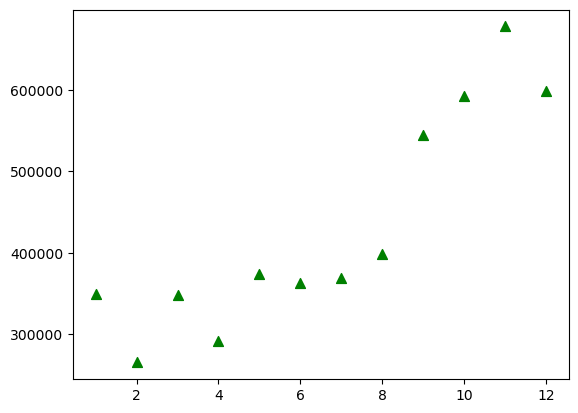

In [11]:
import matplotlib.pyplot as plt 
#plotting a scatterplot
x= sum_of_products_sold_per_month["month"]
y= sum_of_products_sold_per_month["sum of products sold per month"]

# creating a scatter plot
plt.scatter(x,y, c="green", s= 50,marker= '^')   #c = colour ; s= size 
#markers "o" --> circle "^"--> Triangle "*" ---> "star" "s"--> "square"

#adding labels and title 
plt.xlabel=('Month')
plt.ylabel=("products sold")
plt.title=("Product sold Vs Month")


#displaying the plot

plt.show()


<AxesSubplot:title={'center':'Monthly Sales Trend'}, xlabel='Month', ylabel='Total Sales'>

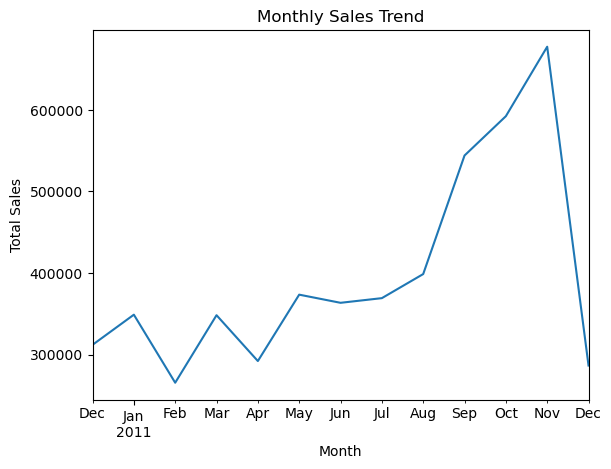

In [12]:
# Monthly sales Data  : Time Based Analysis
monthly_sales = df.resample('M', on='invoice date')['quantity'].sum()
monthly_sales.plot(kind='line', xlabel='Month', ylabel='Total Sales', title='Monthly Sales Trend')


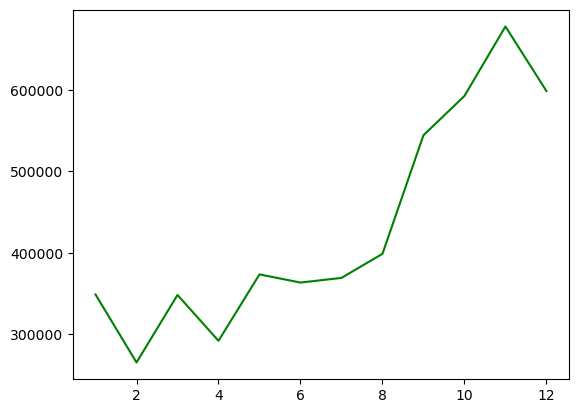

In [13]:
import matplotlib.pyplot as plt 
#plotting a scatterplot
x= sum_of_products_sold_per_month["month"]
y= sum_of_products_sold_per_month["sum of products sold per month"]

# creating a scatter plot
plt.plot(x,y, c="green")   #c = colour ; s= size 
#markers "o" --> circle "^"--> Triangle "*" ---> "star" "s"--> "square"

#adding labels and title 
plt.xlabel=('Month')
plt.ylabel=("products sold")
plt.title=("Product sold Vs Month")


#displaying the plot

plt.show()


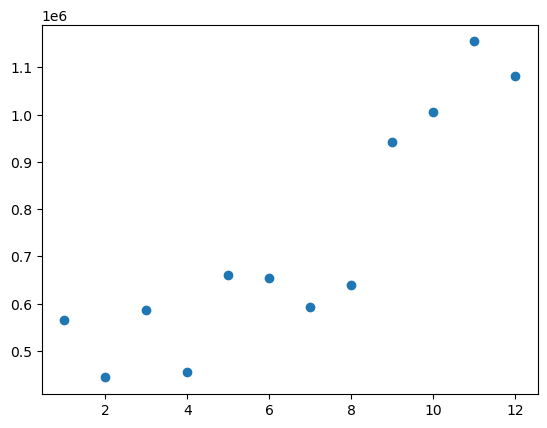

In [14]:
import matplotlib.pyplot as plt 
#plotting a scatterplot
x= sum_of_products_sold_per_month["month"]
y= sum_of_products_sold_per_month["total price"]

# creating a scatter plot
plt.scatter(x,y)

#adding labels and title 
plt.xlabel=('Month')
plt.ylabel=("Revenue")
plt.title=("Month Vs Revenue")


#displaying the plot

plt.show()

In [15]:
df

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
...,...,...,...,...,...,...,...,...,...
396502,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40
396503,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
396504,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80
396505,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80


In [16]:
# country wise sale and revenue generated
country_wise_products_sold = df.groupby(df["country"])[["quantity","total price"]].sum().reset_index()
country_wise_products_sold

,country,quantity,total price
0,Australia,84208,139118.950
1,Austria,4844,8742.680
2,Bahrain,260,548.400
3,Belgium,22962,36927.340
4,Brazil,356,1143.600
5,Canada,2762,3115.440
6,Channel Islands,9490,20157.440
7,Cyprus,6359,13254.690
8,Czech Republic,670,786.740
9,Denmark,8193,18211.340


In [17]:
#country with more sales 
country_wise_products_sold.sort_values("quantity",ascending= False).head(5)

,country,quantity,total price
35,United Kingdom,4264058,7281114.644
23,Netherlands,200834,284655.420
16,Ireland,140523,262780.260
13,Germany,118140,205577.840
12,France,110640,184077.680


In [18]:
#country with more revenue
country_wise_products_sold.sort_values("total price", ascending= False).head(5)

,country,quantity,total price
35,United Kingdom,4264058,7281114.644
23,Netherlands,200834,284655.420
16,Ireland,140523,262780.260
13,Germany,118140,205577.840
12,France,110640,184077.680


# We see that, Country with more sales gives the Max.revenue

In [19]:
#filtering top 5 country
top5_country_with_most_product_sold= country_wise_products_sold.nlargest(5,"quantity")
top5_country_with_most_product_sold

,country,quantity,total price
35,United Kingdom,4264058,7281114.644
23,Netherlands,200834,284655.420
16,Ireland,140523,262780.260
13,Germany,118140,205577.840
12,France,110640,184077.680


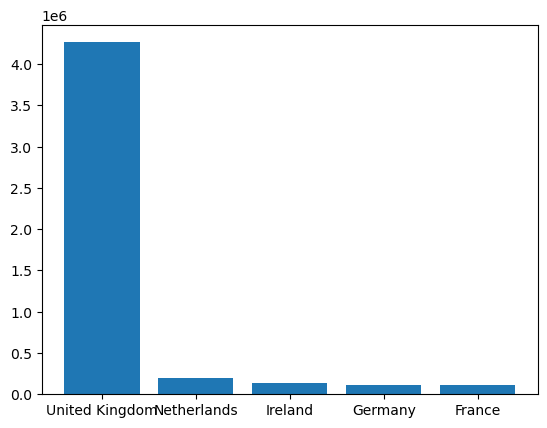

In [20]:
# plotting in a bar chart
import matplotlib.pyplot as plt

#feeding the axis
x= top5_country_with_most_product_sold["country"]
y= top5_country_with_most_product_sold["quantity"]

#creating a bar chart
plt.bar(x,y)

#adding labels
plt.xlabel=("country")
plt.ylabel=("Product sold")
plt.title=("Top 5 countries  Vs Sum of Products Sold")

#displaying the plot

plt.show()

In [21]:
# finding top 5 counties with least sales
top5_country_with_least_product_sold= country_wise_products_sold.nsmallest(5,"quantity")
top5_country_with_least_product_sold

,country,quantity,total price
28,Saudi Arabia,80,145.92
2,Bahrain,260,548.40
27,RSA,351,1002.31
4,Brazil,356,1143.60
20,Lebanon,386,1693.88


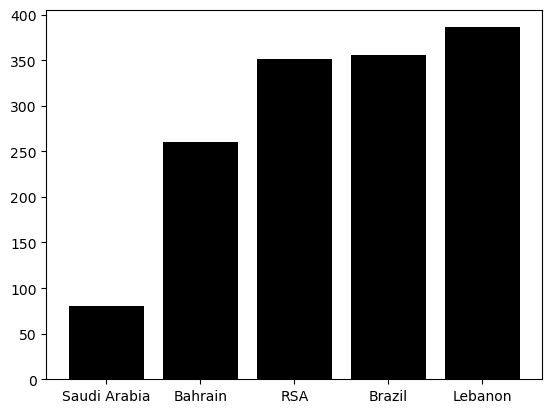

In [22]:
#plotting top 5 countries with least sales

x=top5_country_with_least_product_sold["country"]
y= top5_country_with_least_product_sold["quantity"]

#determining the plot
plt.bar(x,y, color= 'black')

#adding labels

plt.xlabel=("country")
plt.ylabel=("sum of products sold")
plt.title=("Top 5 countries with least ordered products")

#displaying the plot
plt.show()

In [23]:
df

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
...,...,...,...,...,...,...,...,...,...
396502,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40
396503,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
396504,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80
396505,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80


In [24]:
# country wise sale and revenue generated
country_wise_products_sold = df.groupby(df["country"])[["quantity","total price"]].sum().reset_index()
country_wise_products_sold

,country,quantity,total price
0,Australia,84208,139118.950
1,Austria,4844,8742.680
2,Bahrain,260,548.400
3,Belgium,22962,36927.340
4,Brazil,356,1143.600
5,Canada,2762,3115.440
6,Channel Islands,9490,20157.440
7,Cyprus,6359,13254.690
8,Czech Republic,670,786.740
9,Denmark,8193,18211.340


In [25]:
# which product sold the most ?
# what is its revenue ?
# what is the average price for their product category ?
unique_products= df.groupby(df["description"])[["quantity","total price"]].sum().reset_index()
unique_products

,description,quantity,total price
0,4 PURPLE FLOCK DINNER CANDLES,140,270.76
1,50'S CHRISTMAS GIFT BAG LARGE,1885,2272.25
2,DOLLY GIRL BEAKER,2398,2759.50
3,I LOVE LONDON MINI BACKPACK,360,1454.00
4,I LOVE LONDON MINI RUCKSACK,1,4.15
...,...,...,...
3868,ZINC T-LIGHT HOLDER STARS SMALL,4894,3879.98
3869,ZINC TOP 2 DOOR WOODEN SHELF,10,169.50
3870,ZINC WILLIE WINKIE CANDLE STICK,2607,2176.95
3871,ZINC WIRE KITCHEN ORGANISER,25,156.80


In [26]:
#getting the overall idea of our product category
unique_products.describe()

,quantity,total price
count,3873.000000,3873.000000
mean,1335.235993,2267.304032
std,3365.459640,6171.201247
min,1.000000,0.004000
25%,55.000000,115.550000
50%,348.000000,585.000000
75%,1328.000000,1987.930000
max,80995.000000,168469.600000


In [27]:
# top 5 most ordered product and its revenue ?
unique_products.sort_values("quantity", ascending=  False).head(5)


,description,quantity,total price
2316,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
1990,MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.73
3782,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415,13586.25
1760,JUMBO BAG RED RETROSPOT,46181,85220.78
3694,WHITE HANGING HEART T-LIGHT HOLDER,36725,100448.15


In [28]:
# products which are ordered only once ?
only_one =unique_products.sort_values("quantity",ascending= True).head(60)
only_one

,description,quantity,total price
682,CHERRY BLOSSOM PURSE,1,2.95
849,CRACKED GLAZE EARRINGS BROWN,1,2.55
2910,SCALLOP SHELL SOAP DISH,1,2.10
3542,VINTAGE BEAD PINK JEWEL STAND,1,4.95
997,DOLPHIN WINDMILL,1,2.12
2123,MUMMY MOUSE RED GINGHAM RIBBON,1,5.45
450,BLUE NEW BAROQUE FLOCK CANDLESTICK,1,4.65
359,BLACK FINE BEAD NECKLACE W TASSEL,1,5.95
2615,POTTING SHED SOW 'N' GROW SET,1,4.25
2442,PINK CRYSTAL GUITAR PHONE CHARM,1,0.85


In [29]:
#finding the costliest product :))
costliest_product= df.sort_values(["unit price"],ascending= False)
costliest_product

#lets dive deeper !

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
154835,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.500,15098,United Kingdom,38970.000
154840,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.500,15098,United Kingdom,649.500
21465,539080,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-16 08:41:00,295.000,16607,United Kingdom,295.000
31889,540647,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 14:57:00,295.000,17406,United Kingdom,295.000
116078,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-04-28 12:22:00,295.000,14973,United Kingdom,295.000
...,...,...,...,...,...,...,...,...,...
183598,560106,16045,POPART WOODEN PENCILS ASST,100,2011-07-14 20:01:00,0.040,17554,United Kingdom,4.000
255335,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.001,16133,United Kingdom,0.001
193696,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom,0.001
106899,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom,0.001


<AxesSubplot:title={'center':'Monthly Sales Trend'}, xlabel='Month', ylabel='Total Sales'>

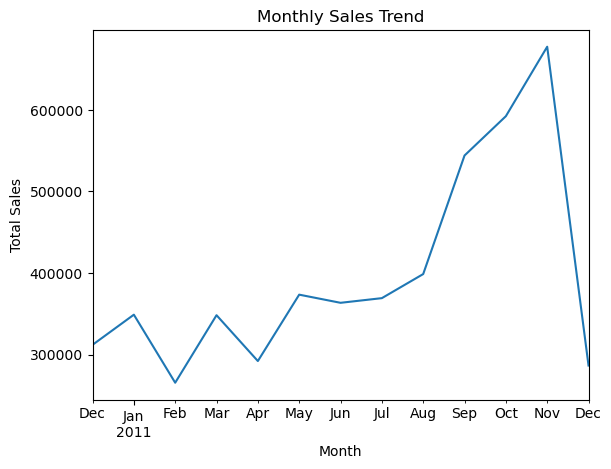

In [30]:
# Monthly sales Data  : Time Based Analysis
monthly_sales = df.resample('M', on='invoice date')['quantity'].sum()
monthly_sales.plot(kind='line', xlabel='Month', ylabel='Total Sales', title='Monthly Sales Trend')


In [31]:
customer_cltv = df.groupby(df['customer ID'])[['total price',"quantity"]].sum().reset_index()
customer_cltv

,customer ID,total price,quantity
0,12346,77183.60,74215
1,12347,4310.00,2458
2,12348,1437.24,2332
3,12349,1457.55,630
4,12350,294.40,196
...,...,...,...
4330,18280,180.60,45
4331,18281,80.82,54
4332,18282,178.05,103
4333,18283,2088.93,1395


<AxesSubplot:title={'center':'Quantity vs. Total Price'}, xlabel='Quantity', ylabel='Total Price'>

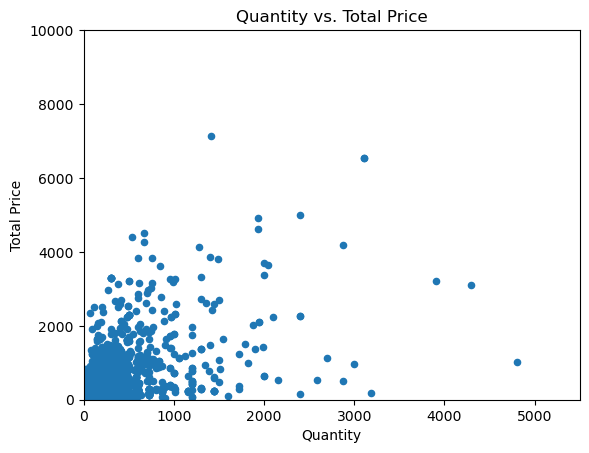

In [32]:
df.plot(kind='scatter', x='quantity', y='total price', xlabel='Quantity', ylabel='Total Price', title='Quantity vs. Total Price',xlim=(0,5500),ylim=(0,10000))
# In order to get hte clear view of the data,I limited the X and Y axis.

In [33]:
df['unit price'].describe()
# we see that the unit price of the products are 

count    396507.000000
mean          2.884128
std           4.354377
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: unit price, dtype: float64

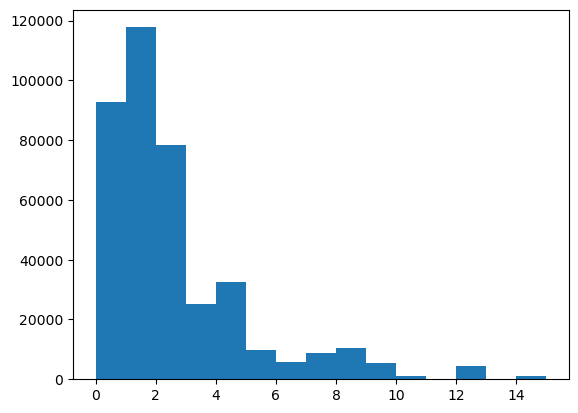

In [34]:
import matplotlib.pyplot as plt

x = df['unit price']
bins= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.hist(x, bins= bins)

plt.xlabel=('Unit Price')  
plt.ylabel=('Frequency')   
plt.title=('Unit Price Distribution')  

plt.show()


In [35]:
df

,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
...,...,...,...,...,...,...,...,...,...
396502,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40
396503,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
396504,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80
396505,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80


# Customer Analysis

# Calculate Customer Lifetime value (CLTV)

In [36]:
# Top 10 customers with most value
customer_cltv.sort_values("total price",ascending= False).head(10)

,customer ID,total price,quantity
1690,14646,279904.10,197420
4198,18102,259657.30,64124
3726,17450,194550.79,69993
3007,16446,168472.50,80997
1880,14911,141059.42,80513
55,12415,125488.77,77669
1334,14156,117379.63,57885
3769,17511,91062.38,64549
0,12346,77183.60,74215
2701,16029,72882.09,40207


In [37]:
# max order value by a customer ?

frequency_of_order= df.groupby(df["customer ID"]).agg({
    "invoice no": 'nunique',
    'total price': 'sum',
}).reset_index()
frequency_of_order.columns=["customer ID", "Total Orders","Amount Spent"]
frequency_of_order

,customer ID,Total Orders,Amount Spent
0,12346,1,77183.60
1,12347,7,4310.00
2,12348,4,1437.24
3,12349,1,1457.55
4,12350,1,294.40
...,...,...,...
4330,18280,1,180.60
4331,18281,1,80.82
4332,18282,2,178.05
4333,18283,16,2088.93


In [38]:
# Max orders by a customer ?
frequency_of_order.sort_values("Total Orders",ascending= False)

,customer ID,Total Orders,Amount Spent
326,12748,206,32317.32
1880,14911,199,141059.42
4008,17841,124,40967.72
562,13089,97,58825.83
2177,15311,91,60767.90
...,...,...,...
1037,13745,1,300.04
2847,16222,1,846.72
1038,13747,1,79.60
1041,13751,1,296.25


In [39]:
# verifying the results !
random_customer= df[df["customer ID"] == 12748].reset_index()
random_customer

,index,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
0,1003,536521,22854,CREAM SWEETHEART EGG HOLDER,1,2010-12-01 12:48:00,4.95,12748,United Kingdom,4.95
1,2507,536641,22187,GREEN CHRISTMAS TREE CARD HOLDER,1,2010-12-02 11:46:00,4.25,12748,United Kingdom,4.25
2,6044,537136,15036,ASSORTED COLOURS SILK FAN,12,2010-12-05 12:42:00,0.75,12748,United Kingdom,9.00
3,6045,537136,21830,ASSORTED CREEPY CRAWLIES,24,2010-12-05 12:42:00,0.42,12748,United Kingdom,10.08
4,6046,537136,84952B,BLACK LOVE BIRD T-LIGHT HOLDER,2,2010-12-05 12:42:00,3.75,12748,United Kingdom,7.50
...,...,...,...,...,...,...,...,...,...,...
4575,396456,581580,37500,TEA TIME TEAPOT IN GIFT BOX,1,2011-12-09 12:20:00,4.95,12748,United Kingdom,4.95
4576,396457,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748,United Kingdom,1.25
4577,396458,581580,21790,VINTAGE SNAP CARDS,1,2011-12-09 12:20:00,0.85,12748,United Kingdom,0.85
4578,396459,581580,22695,WICKER WREATH SMALL,1,2011-12-09 12:20:00,0.59,12748,United Kingdom,0.59


In [40]:
unique_customer = random_customer["invoice no"].nunique()
unique_customer

206

# ploting a grap to understand the user trend!

In [41]:
unique_customer_sales= random_customer.resample('M',on='invoice date')['invoice no'].nunique()


<AxesSubplot:title={'center':'order frequency of customer 12748'}, xlabel='Month', ylabel='Total orders'>

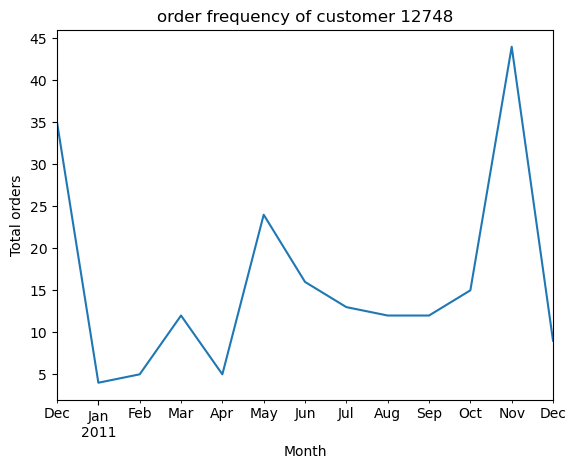

In [42]:
unique_customer_sales.plot(kind='line', x= 'invoice date',y= 'quantity', xlabel= 'Month',ylabel='Total orders', title='order frequency of customer 12748')

In [43]:
random_customer_2= df[df["customer ID"] == 14911].reset_index()
random_customer_2

,index,invoice no,stock code,description,quantity,invoice date,unit price,customer ID,country,total price
0,1390,536540,22150,3 STRIPEY MICE FELTCRAFT,12,2010-12-01 14:05:00,1.95,14911,Ireland,23.40
1,1391,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911,Ireland,17.70
2,1392,536540,85135B,BLUE DRAGONFLY HELICOPTER,2,2010-12-01 14:05:00,7.95,14911,Ireland,15.90
3,1393,536540,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,2010-12-01 14:05:00,9.95,14911,Ireland,59.70
4,1394,536540,21833,CAMOUFLAGE LED TORCH,12,2010-12-01 14:05:00,1.69,14911,Ireland,20.28
...,...,...,...,...,...,...,...,...,...,...
5670,395425,581433,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",24,2011-12-08 15:54:00,1.25,14911,Ireland,30.00
5671,395426,581433,22767,TRIPLE PHOTO FRAME CORNICE,2,2011-12-08 15:54:00,9.95,14911,Ireland,19.90
5672,395427,581433,22472,TV DINNER TRAY DOLLY GIRL,8,2011-12-08 15:54:00,1.95,14911,Ireland,15.60
5673,395428,581433,22473,TV DINNER TRAY VINTAGE PAISLEY,8,2011-12-08 15:54:00,1.95,14911,Ireland,15.60


In [44]:
unique_customer_2 = random_customer_2["invoice no"].nunique()
unique_customer_2

199

In [45]:
unique_customer_sales_2= random_customer_2.resample('M',on='invoice date')['invoice no'].nunique()


<AxesSubplot:title={'center':'order frequency of customer 14911'}, xlabel='Month', ylabel='Total orders'>

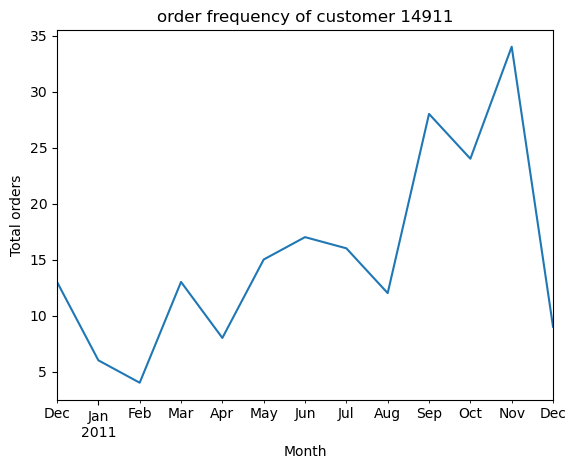

In [46]:
unique_customer_sales_2.plot(kind='line', x= 'invoice date',y= 'quantity', xlabel= 'Month',ylabel='Total orders', title='order frequency of customer 14911')

# Is there any corellation between quantity and price ?


In [47]:
correlation= df["quantity"].corr(df["total price"])
correlation

0.9159376128806056

In [48]:
# we can see a strong positive correlation between quantity and total price.
# Higher the order quantity, Higher the total price :)

In [49]:
df[["quantity","total price"]].corr()

,quantity,total price
quantity,1.000000,0.915938
total price,0.915938,1.000000


In [50]:
import seaborn as sns

c:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(0.0, 176893.18795114715)

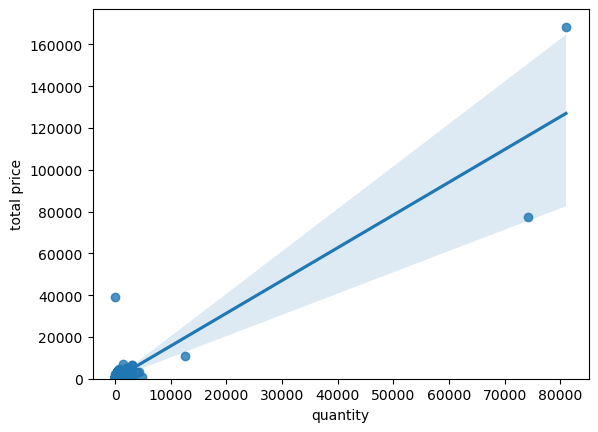

In [51]:
sns.regplot(x="quantity", y="total price",data= df)
plt.ylim(0,)


 Quantity of products purchase seems to be a good predictor of price. Higher the order quantity, Higher the price!

# lets break down the axis a little 

(0.0, 5000.0)

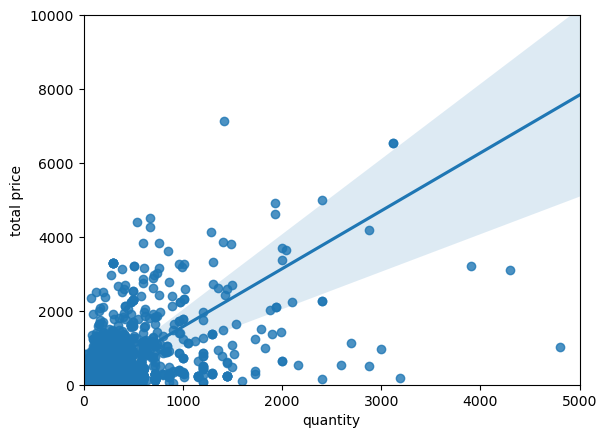

In [52]:
sns.regplot(x="quantity", y="total price",data= df)
plt.ylim(0,10000)
plt.xlim(0,5000)

# Descriptive Statistics

In [53]:
df.describe()

,invoice no,quantity,invoice date,unit price,customer ID,total price
count,396507.000000,396507.000000,396507,396507.000000,396507.000000,396507.000000
mean,560618.896907,13.042315,2011-07-11 00:05:00.353335808,2.884128,15301.362379,22.146566
min,536365.000000,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,549235.000000,2.000000,2011-04-07 11:16:00,1.250000,13975.000000,4.680000
50%,561893.000000,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,572092.000000,12.000000,2011-10-20 14:41:00,3.750000,16801.000000,19.800000
max,581587.000000,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,168469.600000
std,13106.215507,180.702510,NaN,4.354377,1709.787555,309.298476


In [54]:
df.describe(include='object')

,stock code,description,country
count,396507,396507,396507
unique,3661,3873,36
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,2035,2028,354283


In [55]:
df['country'].value_counts().to_frame().head(5)

,count
country,
United Kingdom,354283
Germany,8659
France,8036
Ireland,7236
Spain,2423


In [56]:
# what percent of sales are from the United Kingdom
country_wise_products_sold.head(5)

,country,quantity,total price
0,Australia,84208,139118.95
1,Austria,4844,8742.68
2,Bahrain,260,548.40
3,Belgium,22962,36927.34
4,Brazil,356,1143.60


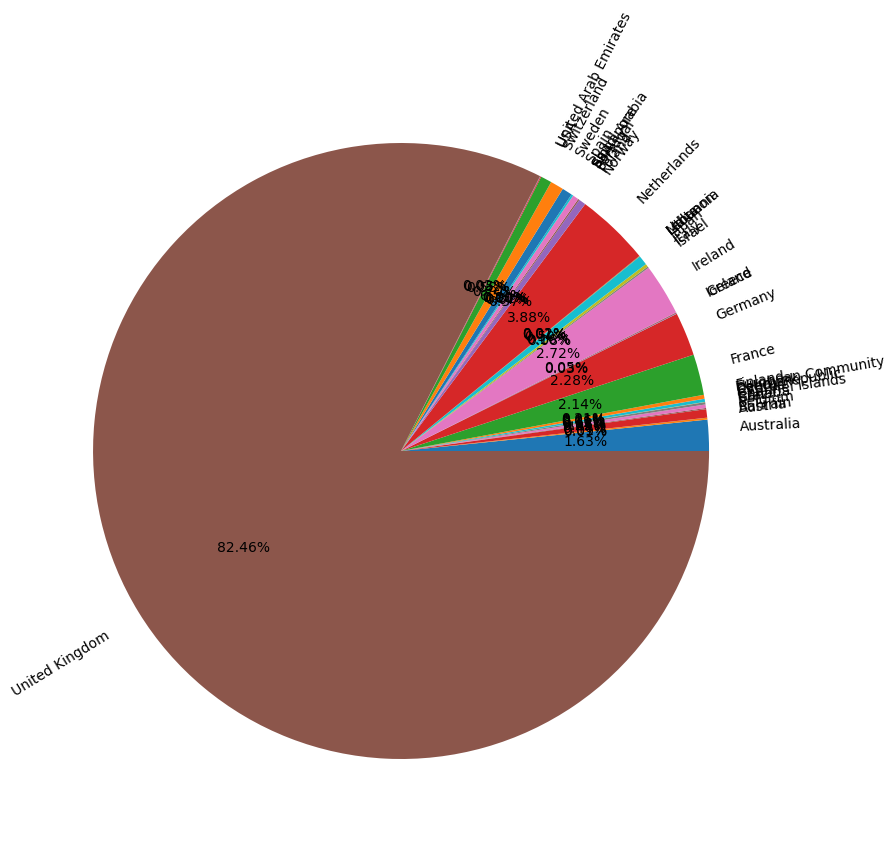

In [57]:
# plotting a pie chart to determine % of quantity sold country wise
values= country_wise_products_sold["quantity"]
labels= country_wise_products_sold["country"]

plt.figure(figsize=(10,10))

plt.pie(values, labels= labels, autopct= '%1.2f%%',rotatelabels= True)
plt.title=("Country wise Products sold")


plt.show()